<a href="https://colab.research.google.com/github/sevvaluluss/yt-machine-learning-exercise/blob/main/Advertising_Multiple_Linear_Regression_anla%C5%9F%C4%B1l%C4%B1r_ekonomi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kütüphaneler içeriye aktarıldı

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Veriseti içeriye aktardık

In [ ]:
data=pd.read_csv("advertising.csv")
veri=data.copy()
veri.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Eksik gözlem var mı? Onları kontrol et

In [ ]:
veri.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Veri tiplerini kontrol et

In [ ]:
veri.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Bağımlı değişken olarak Sales i seçtik. Bağımsız değişken olarak ise TV,Radio,Newspaper ı seçtik. Değişkenler arasındaki korelasyonlara bakıyoruz.


In [ ]:
veri.corr()["Sales"]

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64

Bu korelsoyonu grafik olarak görmek istersemm ;

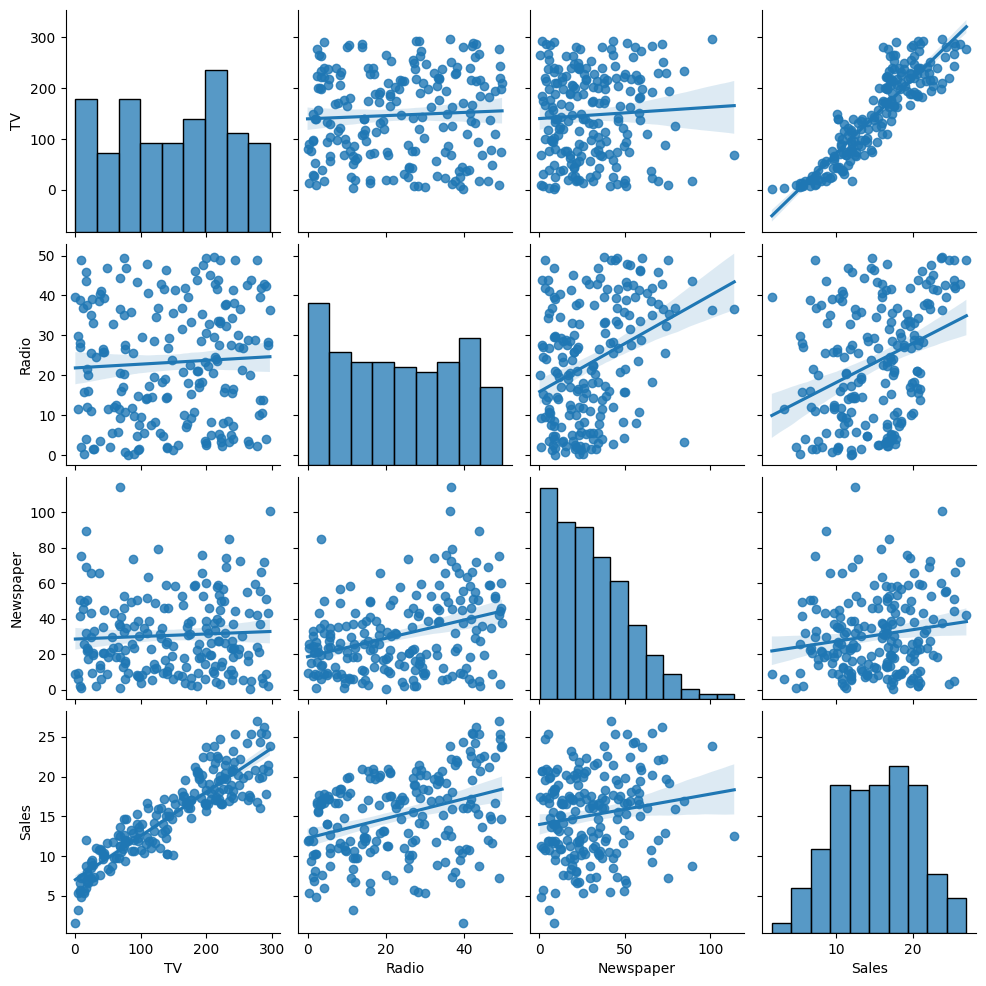

In [ ]:
sns.pairplot(veri,kind="reg")
plt.show()


Grafiğe göre sales ile newspaper ve radio arasında düşük bir korelasyon olduğunu gördük. Bunun sebebi belki outliers dan dolayı olabilir. Bu yüzden eksik gözlem var mı kontrol etmeliyiz.

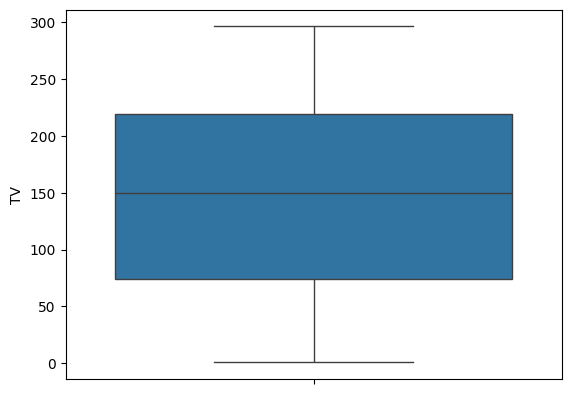

In [ ]:
sns.boxplot(veri["TV"])
plt.show()

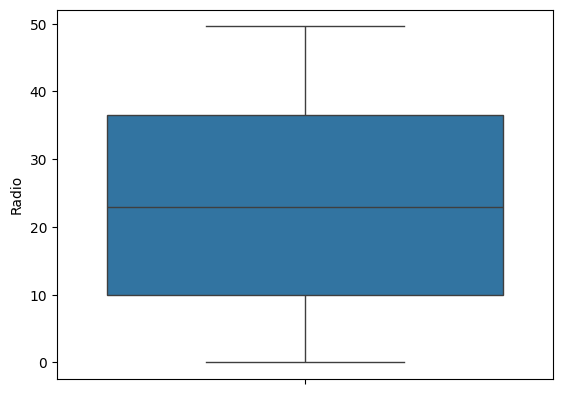

In [ ]:
sns.boxplot(veri["Radio"])
plt.show()

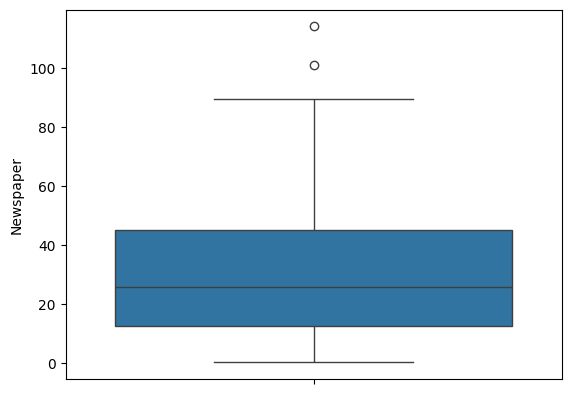

In [ ]:
sns.boxplot(veri["Newspaper"])
plt.show()

Newspaper değişkeninde outliers olduğunu görüyoruz. Bu outliers değerini yok etmek içinn Q1-Q3 YÖNTEMİNİ kullanıyoruz. BASKILAMA YÖNTEMİ

In [ ]:
Q1=veri["Newspaper"].quantile(0.25)
Q3=veri["Newspaper"].quantile(0.75)
IQR=Q3-Q1
ustsinir=Q3+1.5*IQR
aykırı=veri["Newspaper"]>ustsinir
veri.loc[aykırı,"Newspaper"] =ustsinir

<Axes: ylabel='Newspaper'>

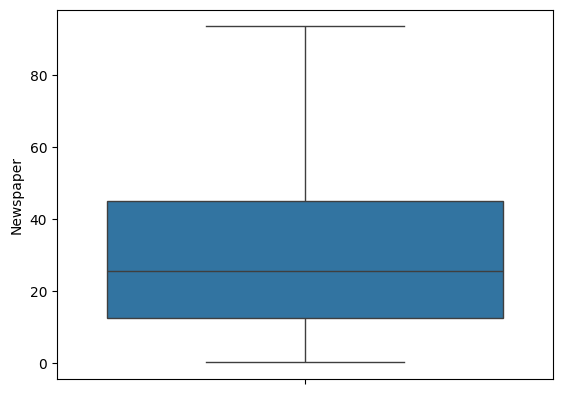

In [ ]:
sns.boxplot(veri["Newspaper"])

OLS(En küçük kareler) sonuçlarına bakalım.

In [ ]:
y=veri["Sales"]
X=veri[["TV","Radio","Newspaper"]]

Modeli kuralım.

In [ ]:
sabit=sm.add_constant(X)
model=sm.OLS(y,sabit).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           8.13e-99
Time:                        05:39:52   Log-Likelihood:                -383.33
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6246      0.308     15.004      0.0

Yukarıda OLS sonuçlarını incledikten sonra Modeli eğitmek için verileri test ve train olarak ayırıyoruz.

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Yukarıda model oluşturup eğittimiz verileri test edelim

In [ ]:
tahmin=lr.predict(X_test)
tahmin

array([17.03857023, 20.41224567, 23.72680585,  9.27402631, 21.67588246,
       12.57248747, 21.079302  ,  8.68896582, 17.23608892, 16.66721166,
        8.91830726,  8.48302102, 18.22010213,  8.06262096, 12.64688577,
       14.93424298,  8.12943561, 17.89617846, 11.00940434, 20.47493553,
       20.81433329, 12.52107089, 10.89998123, 22.39592372,  9.41357487,
        7.92511238, 20.83849755, 13.81240535, 10.77097231,  7.92082033,
       15.96004623, 10.63279677, 20.80662251, 10.44330049, 21.58135402,
       21.17858248, 12.12182687, 22.81531338, 12.60611123,  6.46425169])

TAHMİN VE GERÇEK DEĞERİ KARŞILAŞTIRALIM

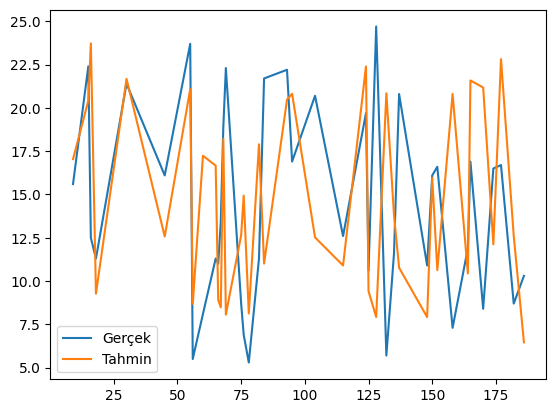

In [ ]:
# Assuming y_test is a pandas Series
y_test = y_test.sort_index()

# Assuming tahmin is some other pandas Series or list
df = pd.DataFrame({"Gerçek": y_test, "Tahmin": tahmin})
df.plot(kind="line")
plt.show()